In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
%matplotlib inline
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [83]:
# read first page of the websites

In [3]:
httplaptop=urlopen('https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=1')
laptopdata=httplaptop.read()

In [4]:
print(laptopdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [5]:
# total no of pages 18 get all links

In [6]:
for i in range(2,18):
    domain ='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
    httplaptop1=urlopen(domain+str(i))
    laptopdata1=httplaptop1.read() 
    laptopdata=laptopdata+laptopdata1

In [7]:
SoupData=soup(laptopdata,'html.parser')
containers= SoupData.findAll('div',{'class':'_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 408


In [21]:
f=open('Laptop_Data.csv','wb')
f.write('ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL\n'.encode())
for container in containers:
    product = container.findAll('div',{'class':'_4rR01T'})
    ProductName=product[0].text.replace(',','')
    stars = container.find_all('div',{'class':'_3LWZlK'})
    try:
        Star=stars[0].text
    except:
        Star=0
    
    rating =container.findAll('span',{'class':'_2_R_DZ'})
    try:
        Ratings=rating[0].text.replace(',','')
    except:
        Ratings="Rating is not provided"
    Price = container.find('div',{'class':'_30jeq3 _1_WHN1'})
    try:
        CurrPrice=Price.text.replace(',','').replace('₹','')
    except:
        currPrice=0
    
    money = container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP= money.text.replace(',','').replace('₹','')
    except:
        MRP=0
    info = container.findAll('li',{'class':'rgWa7D'})
    Processer = info[0].text.replace(',','-')
    Ram =info[1].text
    OS =info[2].text
    SSD =info[3].text
    Display=info[4].text
    image = container.img
    imageURL = image.get('src')
    f.write(f"{ProductName},{Star},{Ratings},{CurrPrice},{MRP},{Processer},{Ram},{OS},{SSD},{Display},{imageURL}\n".encode())
    print(ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL)
    print('/n')

acer Extensa Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) EX 215-54 Thin and Light Laptop 4.3 344 Ratings & 32 Reviews 31990 39999 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 256 GB SSD 39.62 cm (15.6 Inch) Display https://rukminim1.flixcart.com/image/312/312/l5e81ow0/computer/j/w/o/ex-215-54-thin-and-light-laptop-acer-original-imagg28wzdeny2jq.jpeg?q=70
/n
acer Extensa Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) EX 215-54-583M Thin and Light Laptop 3.9 138 Ratings & 6 Reviews 40990 60999 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD 39.62 cm (15.6 Inch) Display https://rukminim1.flixcart.com/image/312/312/l5e81ow0/computer/j/w/o/ex-215-54-thin-and-light-laptop-acer-original-imagg28wzdeny2jq.jpeg?q=70
/n
HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ... 4.4 11615 Ratings & 1186 Reviews 49990 63539 AMD Ryzen 5 Hexa Core Process

ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312WS Thin and Light Laptop 4.3 1170 Ratings & 148 Reviews 37000 59990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 256 GB SSD 39.62 cm (15.6 inch) Display https://rukminim1.flixcart.com/image/312/312/kp2y2kw0/computer/y/0/c/na-thin-and-light-laptop-asus-original-imag3ebnzawky4kn.jpeg?q=70
/n
HP Ryzen 3 Quad Core 5th Gen - (8 GB/256 GB SSD/Windows 11 Home) 15s-eq2146AU Laptop 0 Rating is not provided 40490 47870 AMD Ryzen 3 Quad Core Processor (5th Gen) 8 GB DDR4 RAM Windows 11 Operating System 256 GB SSD 39.62 cm (15.6 inch) Display https://rukminim1.flixcart.com/image/312/312/l4ssfww0/computer/c/f/u/15s-eq2146au-laptop-hp-original-imagfmadnuzgh8xy.jpeg?q=70
/n
Infinix INBook X2 Plus Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) XL25 Thin and Light Laptop 4.3 35 Ratings & 9 Reviews 42990 54990 Intel Core i5 Processor (11th Gen) 8 GB LPDDR4X RAM 64 bit Windows 11 Operating S

In [ ]:
#copy the file data in excel make a new csv file ex-boo1.csv

In [29]:
df=pd.read_csv(r"C:\Users\ajitr\Book1.csv")
df

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,acer Extensa Core i3 11th Gen - (8 GB/256 GB S...,4.3,344 Ratings & 32 Reviews,31990,39999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/l...,NaN,NaN,NaN,NaN,NaN,NaN
1,acer Extensa Core i5 11th Gen - (8 GB/512 GB S...,3.9,138 Ratings & 6 Reviews,40990,60999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/l...,NaN,NaN,NaN,NaN,NaN,NaN
2,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,11615 Ratings & 1186 Reviews,49990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...,NaN,NaN,NaN,NaN,NaN,NaN
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,4.2,79 Ratings & 6 Reviews,45990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...,NaN,NaN,NaN,NaN,NaN,NaN
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,9687 Ratings & 965 Reviews,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/x...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Infinix INBook X2 Plus Core i5 11th Gen - (8 G...,4.3,35 Ratings & 9 Reviews,42990,54990,Intel Core i5 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...,NaN,NaN,NaN,NaN,NaN,NaN
384,HP Ryzen 3 Dual Core 3rd Gen - (8 GB/1 TB HDD/...,4.3,23 Ratings & 2 Reviews,40899,43499,AMD Ryzen 3 Dual Core Processor (3rd Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...,NaN,NaN,NaN,NaN,NaN,NaN
385,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,3.8,5 Ratings & 1 Reviews,24900,39999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/x...,NaN,NaN,NaN,NaN,NaN,NaN
386,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,4.2,220 Ratings & 34 Reviews,35500,37990,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# drop unknown columns

In [31]:
df=df.drop(df.loc[:, 'Unnamed: 11':'Unnamed: 16'].columns, axis=1)
df

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL
0,acer Extensa Core i3 11th Gen - (8 GB/256 GB S...,4.3,344 Ratings & 32 Reviews,31990,39999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
1,acer Extensa Core i5 11th Gen - (8 GB/512 GB S...,3.9,138 Ratings & 6 Reviews,40990,60999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
2,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,11615 Ratings & 1186 Reviews,49990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,4.2,79 Ratings & 6 Reviews,45990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,9687 Ratings & 965 Reviews,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...,...
383,Infinix INBook X2 Plus Core i5 11th Gen - (8 G...,4.3,35 Ratings & 9 Reviews,42990,54990,Intel Core i5 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
384,HP Ryzen 3 Dual Core 3rd Gen - (8 GB/1 TB HDD/...,4.3,23 Ratings & 2 Reviews,40899,43499,AMD Ryzen 3 Dual Core Processor (3rd Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
385,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,3.8,5 Ratings & 1 Reviews,24900,39999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
386,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,4.2,220 Ratings & 34 Reviews,35500,37990,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  388 non-null    object 
 1   Star         388 non-null    float64
 2   Ratings      388 non-null    object 
 3   CurrPrice    388 non-null    int64  
 4   MRP          388 non-null    int64  
 5   Processer    388 non-null    object 
 6   Ram          388 non-null    object 
 7   OS           388 non-null    object 
 8   SSD          388 non-null    object 
 9   Display      388 non-null    object 
 10  imageURL     388 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 33.5+ KB


# top 10 laptop in high price

In [61]:

df.sort_values(['CurrPrice'],ascending=False).head(10)

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL
254,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,5114 Ratings & 562 Reviews,64990,81990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
300,ASUS Vivobook 15 Core i5 10th Gen - (8 GB/512 ...,4.2,110 Ratings & 5 Reviews,50000,59999,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
86,ASUS VivoBook Flip 14 Core i3 11th Gen - (8 GB...,4.0,140 Ratings & 20 Reviews,49990,67990,Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/k...
2,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,11615 Ratings & 1186 Reviews,49990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
92,ASUS VivoBook Flip 14 Core i3 11th Gen - (8 GB...,4.0,140 Ratings & 20 Reviews,49990,69990,Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/l...
6,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,4334 Ratings & 419 Reviews,49990,70990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
372,ASUS Asus Vivobook 15 Core i5 11th Gen - (8 GB...,3.3,4 Ratings & 2 Reviews,49990,68990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
13,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core AMD ...,4.5,402 Ratings & 55 Reviews,49990,76890,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
110,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,13262 Ratings & 1426 Reviews,49990,89999,Free upgrade to Windows 11 when available,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
44,Lenovo IdeaPad Core i5 11th Gen - (8 GB/512 GB...,4.3,2468 Ratings & 208 Reviews,49928,83890,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...


# top 10 laptop in Low price

In [50]:
df.sort_values(['CurrPrice'],ascending=True).head(10)

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL
100,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,1699 Ratings & 264 Reviews,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty,https://rukminim1.flixcart.com/image/312/312/x...
70,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,3.7,1517 Ratings & 204 Reviews,17990,25990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,https://rukminim1.flixcart.com/image/312/312/k...
325,Lenovo Athlon Dual Core 3050U - (4 GB/256 GB S...,4.0,4 Ratings & 1 Reviews,18990,29999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,35.56 cm (14 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
282,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,3.6,381 Ratings & 50 Reviews,18990,22990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,64 bit Chrome Operating System,29.46 cm (11.6 Inch) Display,1 Year onsite warranty,https://rukminim1.flixcart.com/image/312/312/k...
320,Avita SATUS ULTIMUS Celeron Dual Core - (4 GB/...,3.9,616 Ratings & 87 Reviews,18990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,128 GB SSD,35.81 cm (14.1 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
29,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.8,158 Ratings & 12 Reviews,19990,36000,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,DOS Operating System,256 GB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
220,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,892 Ratings & 126 Reviews,20250,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,https://rukminim1.flixcart.com/image/312/312/l...
25,Infinix INBook X1 Neo Series Celeron Quad Core...,4.1,685 Ratings & 116 Reviews,20990,29990,Intel Celeron Quad Core Processor,4 GB LPDDR4X RAM,64 bit Windows 11 Operating System,128 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
240,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,1699 Ratings & 264 Reviews,20990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty,https://rukminim1.flixcart.com/image/312/312/l...
256,HP Chromebook MediaTek Kompanio 500 - (4 GB/64...,3.8,5917 Ratings & 678 Reviews,21490,25451,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty,https://rukminim1.flixcart.com/image/312/312/k...


# Top 10 Laptop of highest rating

In [54]:
df.sort_values(['Star'],ascending=False).head(10)

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL
280,Lenovo Core i3 10th Gen - (4 GB/256 GB SSD/Win...,5.0,1 Ratings & 1 Reviews,37890,48900,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
224,Lenovo Core i3 10th Gen - (8 GB/256 GB SSD/Win...,5.0,4 Ratings & 0 Reviews,38980,56800,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
62,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,4.9,7 Ratings & 0 Reviews,34490,45869,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
196,ASUS Core i3 12th Gen - (8 GB/512 GB SSD/Windo...,4.7,3 Ratings & 2 Reviews,40990,57990,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
326,HP Ryzen 3 Dual Core - (8 GB/256 GB HDD/Window...,4.7,3 Ratings & 0 Reviews,36600,42150,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB HDD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/x...
369,HP 15s Ryzen 5 Quad Core 3500U - (8 GB/512 GB ...,4.5,1673 Ratings & 345 Reviews,45116,48471,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
146,HP 255 G8 Ryzen 3 Dual Core AMD Ryzen3 3250 - ...,4.5,4 Ratings & 0 Reviews,34190,44912,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
288,ASUS Vivobook Core i3 11th Gen - (4 GB/256 GB ...,4.5,79 Ratings & 10 Reviews,34990,44990,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
364,acer Aspire 3 Celeron Dual Core - (4 GB/256 GB...,4.5,21 Ratings & 6 Reviews,29800,29999,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,https://rukminim1.flixcart.com/image/312/312/l...
13,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core AMD ...,4.5,402 Ratings & 55 Reviews,49990,76890,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,https://rukminim1.flixcart.com/image/312/312/k...


# CURRENT PRICE AND MRP RELATION TO FIND MAXIMUM DISCOUNT

<AxesSubplot:xlabel='CurrPrice', ylabel='MRP'>

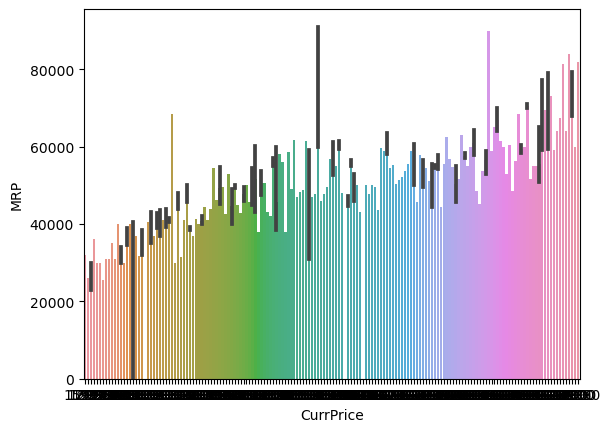

In [65]:
sns.barplot(x='CurrPrice',y='MRP',data=df)

# MAXIMUM DISCOUNT PRODUCT

In [72]:
df["discount"]=(df["MRP"]-df["CurrPrice"])/df["MRP"]

In [77]:
df[df["discount"]==df["discount"].max()]

,ProductName,Star,Ratings,CurrPrice,MRP,Processer,Ram,OS,SSD,Display,imageURL,discount
80,Lenovo Core i3 11th Gen - (8 GB/512 GB SSD/Win...,4.1,45 Ratings & 3 Reviews,38490,90990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/x...,0.576986
